<a href="https://colab.research.google.com/github/Debojyoti83/SwiftETA-Optimizing-Delivery-Time-Prediction-for-Intra-City-Logistics/blob/main/Porter_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Porter: Neural Networks Regression**

# **About "Porter" :**

* Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the countrys 40 billion intra-city logistics market.

* Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence.

# **Project Objective :**

* This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

#**Import Libraries :**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#**Loading The Dataset :**

In [ ]:
!gdown 1IjYt2gd3CinhhxBaUnQBCCRRQIh4_n-P

Downloading...
From: https://drive.google.com/uc?id=1IjYt2gd3CinhhxBaUnQBCCRRQIh4_n-P
To: /content/dataset.csv
100% 23.8M/23.8M [00:00<00:00, 64.8MB/s]


In [ ]:
Data = pd.read_csv("/content/dataset.csv")

In [ ]:
df = Data.copy(deep=True)

In [ ]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [ ]:
print('Rows:', df.shape[0],'\n' 'Columns: ',df.shape[1])

Rows: 197428 
Columns:  14


In [ ]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')

#**Concise Summary:**

In [ ]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

#**Insight:**
- store_id and store primary category are object or string dtype variables.
- Created_at and actual_delivery_time are date_time variables.
- The rest all are either numeric cont. or cat. variables.
- There are some missing values present in some of the features

#**Datatype Conversion:**

In [ ]:
# Converting the features to date_time
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [ ]:
# Seperating cat and cont variables based on business sense.
cat_var = ['market_id', 'created_at', 'actual_delivery_time', 'store_id', 'store_primary_category', 'order_protocol',
           'total_items', 'num_distinct_items']
cont_var = ['subtotal', 'min_item_price', 'max_item_price', 'total_onshift_partners',
            'total_busy_partners', 'total_outstanding_orders']

In [ ]:
df[['created_at', 'actual_delivery_time']].describe().T

,count,mean,min,25%,50%,75%,max
created_at,197428,2015-02-04 22:00:09.537962752,2014-10-19 05:24:15,2015-01-29 02:32:42,2015-02-05 03:29:09.500000,2015-02-12 01:39:18.500000,2015-02-18 06:00:44
actual_delivery_time,197421,2015-02-04 22:48:23.348914432,2015-01-21 15:58:11,2015-01-29 03:22:29,2015-02-05 04:40:41,2015-02-12 02:25:26,2015-02-19 22:45:31


In [ ]:
df[cat_var].astype('object').describe().T

,count,unique,top,freq
market_id,196441.0,6.0,2.0,55058.0
created_at,197428,180985,2015-02-11 19:50:43,6
actual_delivery_time,197421,178110,2015-02-11 20:40:45,5
store_id,197428,6743,d43ab110ab2489d6b9b2caa394bf920f,937
store_primary_category,192668,74,american,19399
order_protocol,196433.0,7.0,1.0,54725.0
total_items,197428,57,2,55134
num_distinct_items,197428,20,2,59174


In [ ]:
df[cont_var].describe().T

,count,mean,std,min,25%,50%,75%,max
subtotal,197428.0,2682.331402,1823.093688,0.0,1400.0,2200.0,3395.0,27100.0
min_item_price,197428.0,686.218470,522.038648,-86.0,299.0,595.0,949.0,14700.0
max_item_price,197428.0,1159.588630,558.411377,0.0,800.0,1095.0,1395.0,14700.0
total_onshift_partners,181166.0,44.808093,34.526783,-4.0,17.0,37.0,65.0,171.0
total_busy_partners,181166.0,41.739747,32.145733,-5.0,15.0,34.0,62.0,154.0
total_outstanding_orders,181166.0,58.050065,52.661830,-6.0,17.0,41.0,85.0,285.0


#**Insight:**
- We have orders created between 2014-10-19 to 2015-02-18 and delivered between 2015-01-21 and 2015-02-19.
- We have only 5 months of data
- There are 6 unique market ids with 2 topping the list
- We have 937 unique stores with american store category topping the list.
- There are 7 unique order_protocols with 1 topping the list (We do not have the information on what each order protocol means.)
- Most of the orders had carts with just 2 distinct items.
- 75% of all the all the orders had carts with just 4 or less than 4 items.
- Mean subtotal is around 2682rs.
- Individual item prices are as high as 14700rs with 75% of item prices just under 949rs.
- I can see that min and max of most of the features does not make sense and they far away from the mean.
- These are outliers which need to be cleaned.

#**Missing Values & Their Treatment:**

In [ ]:
total_null_values = df.isnull().sum().to_frame().sort_values(0,ascending=False).rename(columns={0:'Total_null_values'})
total_null_values['%'] = (total_null_values["Total_null_values"]/len(df))*100
total_null_values

,Total_null_values,%
total_onshift_partners,16262,8.236927
total_busy_partners,16262,8.236927
total_outstanding_orders,16262,8.236927
store_primary_category,4760,2.411006
order_protocol,995,0.503981
market_id,987,0.499929
actual_delivery_time,7,0.003546
created_at,0,0.000000
store_id,0,0.000000
total_items,0,0.000000


In [ ]:
# Filling the missing values using the KNN imputation technique
from sklearn.impute import KNNImputer

# Separate the numeric and non-numeric columns
non_numeric_cols = ['created_at', 'actual_delivery_time', 'store_id', 'store_primary_category']
numeric_cols = df.drop(non_numeric_cols, axis=1)

# Apply KNN imputation on the numeric columns
imputer = KNNImputer(n_neighbors=5)
imputed_data = pd.DataFrame(imputer.fit_transform(numeric_cols), columns=numeric_cols.columns)

# Combine imputed numeric data with non-numeric data
df = pd.concat([imputed_data, df[non_numeric_cols].reset_index(drop=True)], axis=1)

In [ ]:
# Imputing 'actual_delivery_time' based on median delivery duration
# Calculate the delivery duration where both timestamps are present
df['delivery_duration'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()

# Find the median delivery duration
median_duration = df['delivery_duration'].median()

# Impute missing 'actual_delivery_time' using the median duration
df['actual_delivery_time'] = df['actual_delivery_time'].fillna(df['created_at'] + pd.to_timedelta(median_duration, unit='s'))

# Dropping the temporary 'delivery_duration' column
df = df.drop(columns=['delivery_duration'])

# Imputing 'store_primary_category' using the mode (most frequent category)
mode_category = df['store_primary_category'].mode()[0]
df['store_primary_category'] = df['store_primary_category'].fillna(mode_category)


In [ ]:
total_null_values = df.isnull().sum().to_frame().sort_values(0,ascending=False).rename(columns={0:'Total_null_values'})
total_null_values['%'] = (total_null_values["Total_null_values"]/len(df))*100
total_null_values

,Total_null_values,%
market_id,0,0.0
order_protocol,0,0.0
total_items,0,0.0
subtotal,0,0.0
num_distinct_items,0,0.0
min_item_price,0,0.0
max_item_price,0,0.0
total_onshift_partners,0,0.0
total_busy_partners,0,0.0
total_outstanding_orders,0,0.0


#**Cheking Duplicate values:**

In [ ]:
df.duplicated().sum()

0

# **EDA, Data Cleaning, and Feature Engineering:**

### 1. Analyzing and visualizing the data
### 2. Getting inferences

### Create new feature time_taken, and time taken mins

In [ ]:
df['time_taken']=df['actual_delivery_time']-df['created_at']
df['time_taken_mins']=pd.to_timedelta(df['time_taken'])/pd.Timedelta('1m')

#extract hour and day separately
df['hour']=df['created_at'].dt.hour
df['day']=df['created_at'].dt.dayofweek

### dropping unused columns, which will not be used:

In [ ]:
df.drop(['time_taken','created_at','actual_delivery_time'],axis=1,inplace=True)

In [ ]:
df.store_primary_category.unique()

array(['american', 'mexican', 'indian', 'italian', 'sandwich', 'thai',
       'cafe', 'salad', 'pizza', 'chinese', 'singaporean', 'burger',
       'breakfast', 'mediterranean', 'japanese', 'greek', 'catering',
       'filipino', 'convenience-store', 'other', 'korean', 'vegan',
       'asian', 'barbecue', 'fast', 'dessert', 'smoothie', 'seafood',
       'vietnamese', 'cajun', 'steak', 'middle-eastern', 'soup',
       'vegetarian', 'persian', 'nepalese', 'sushi', 'latin-american',
       'hawaiian', 'chocolate', 'burmese', 'british', 'pasta', 'alcohol',
       'dim-sum', 'peruvian', 'turkish', 'malaysian', 'ethiopian',
       'afghan', 'bubble-tea', 'german', 'french', 'caribbean',
       'gluten-free', 'comfort-food', 'gastropub', 'pakistani',
       'moroccan', 'spanish', 'southern', 'tapas', 'russian', 'brazilian',
       'european', 'cheese', 'african', 'argentine', 'kosher', 'irish',
       'lebanese', 'belgian', 'indonesian', 'alcohol-plus-food'],
      dtype=object)

In [ ]:
df['store_primary_category']=df['store_primary_category'].astype('category').cat.codes
df['market_id'] = df['market_id'].astype(int)
df['order_protocol'] = df['order_protocol'].astype(int)

In [ ]:
df.drop(['store_id'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 197428 non-null  int64  
 1   order_protocol            197428 non-null  int64  
 2   total_items               197428 non-null  float64
 3   subtotal                  197428 non-null  float64
 4   num_distinct_items        197428 non-null  float64
 5   min_item_price            197428 non-null  float64
 6   max_item_price            197428 non-null  float64
 7   total_onshift_partners    197428 non-null  float64
 8   total_busy_partners       197428 non-null  float64
 9   total_outstanding_orders  197428 non-null  float64
 10  store_primary_category    197428 non-null  int8   
 11  time_taken_mins           197428 non-null  float64
 12  hour                      197428 non-null  int32  
 13  day                       197428 non-null  i

In [ ]:
df.head()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,store_primary_category,time_taken_mins,hour,day
0,1,1,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,4,62.983333,22,4
1,2,2,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,47,67.066667,21,1
2,3,1,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,4,29.683333,20,3
3,3,1,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,4,51.250000,21,1
4,3,1,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,4,39.833333,2,6


In [ ]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,store_primary_category,time_taken_mins,hour,day
count,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000
mean,2.979810,2.879860,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.645865,41.567207,57.796644,35.770894,48.470810,8.467213,3.218966
std,1.523814,1.501537,2.666546,1823.093688,1.630255,522.038648,558.411377,33.469691,31.172795,51.050751,21.465428,320.487802,8.658759,2.045789
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,1.683333,0.000000,0.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,18.000000,16.000000,18.000000,14.000000,35.066667,2.000000,1.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,42.400000,39.000000,44.333333,3.000000,3.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,64.000000,61.000000,83.000000,56.000000,56.350000,19.000000,5.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,73.000000,141947.650000,23.000000,6.000000


# Univariate Analysis

In [ ]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for
             p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height()
            ax.annotate(percentage, (x, y), size = 12)


def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 4 - 0.02
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

In [ ]:
sns.set(rc={'figure.figsize':(5.5,5)})

## 1. market_id:

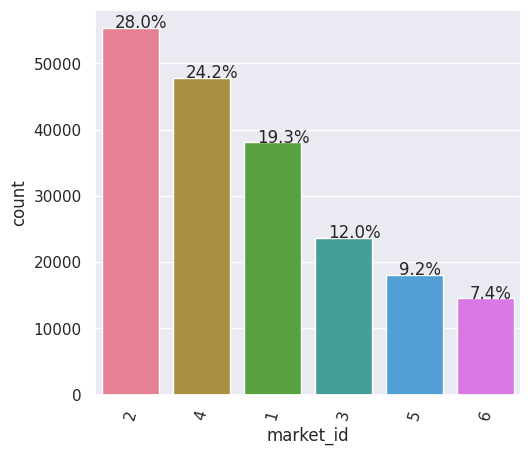

In [ ]:
ax = sns.countplot(data=df, x="market_id", order = df['market_id'].value_counts().index, palette="husl")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75)
without_hue(ax,df.market_id)

## 2. order_protocol :

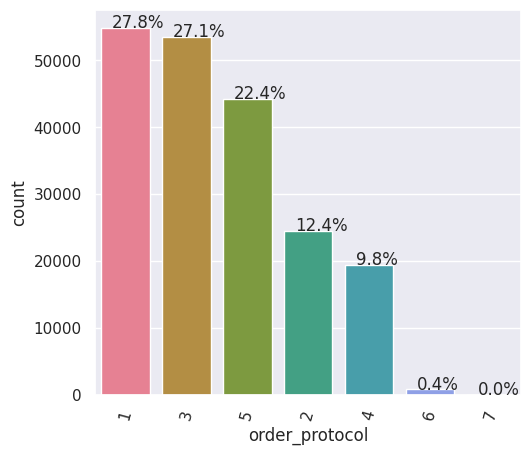

In [ ]:
ax = sns.countplot(data=df,x="order_protocol", order = df['order_protocol'].value_counts().index,  palette="husl")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75)
without_hue(ax,df.order_protocol)

## 3. store_primary_category :

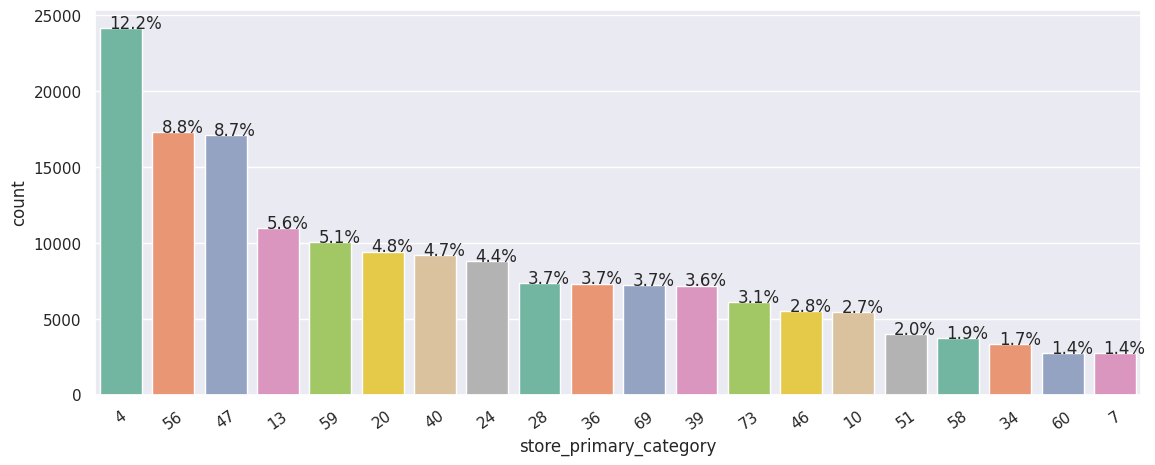

In [ ]:
sns.set(rc={'figure.figsize':(13.5,5)})
ax = sns.countplot(data=df,x="store_primary_category", order = df['store_primary_category'].value_counts().head(20).index, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 35)
without_hue(ax,df.store_primary_category)

## 4. num_distinct_items :


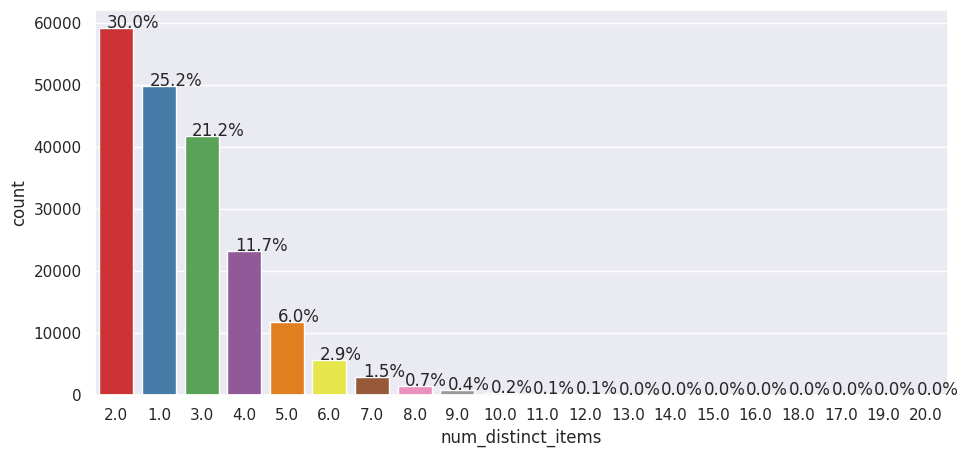

In [ ]:
sns.set(rc={'figure.figsize':(11,5)})
ax = sns.countplot(data=df,x="num_distinct_items", order = df['num_distinct_items'].value_counts().head(20).index, palette="Set1")
ax.set_xticklabels(ax.get_xticklabels())
without_hue(ax,df.num_distinct_items)

## 5. time_taken_mins

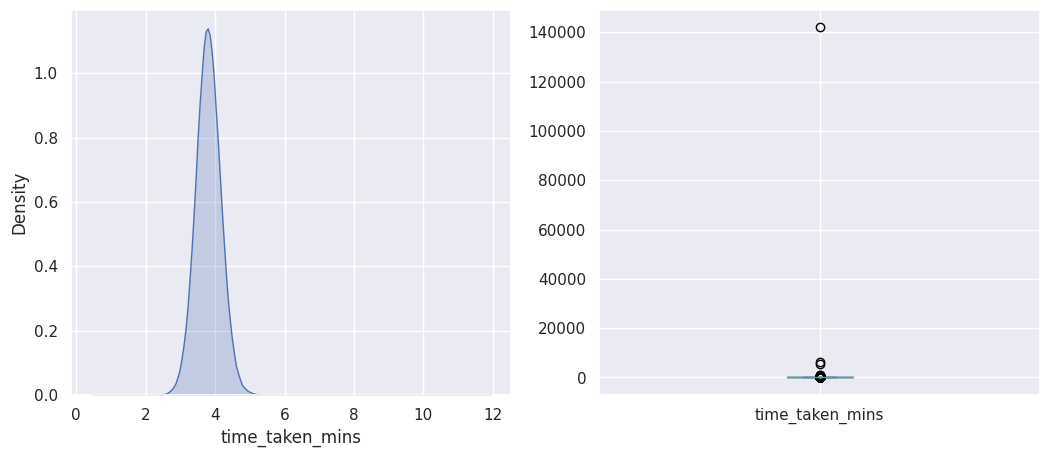

In [ ]:
plt.subplot(121)
sns.kdeplot(np.log(df.time_taken_mins),shade=True)
plt.subplot(122)
df.time_taken_mins.plot.box(figsize=(12.5,5))
plt.show()

## 6. total_onshift_partners :

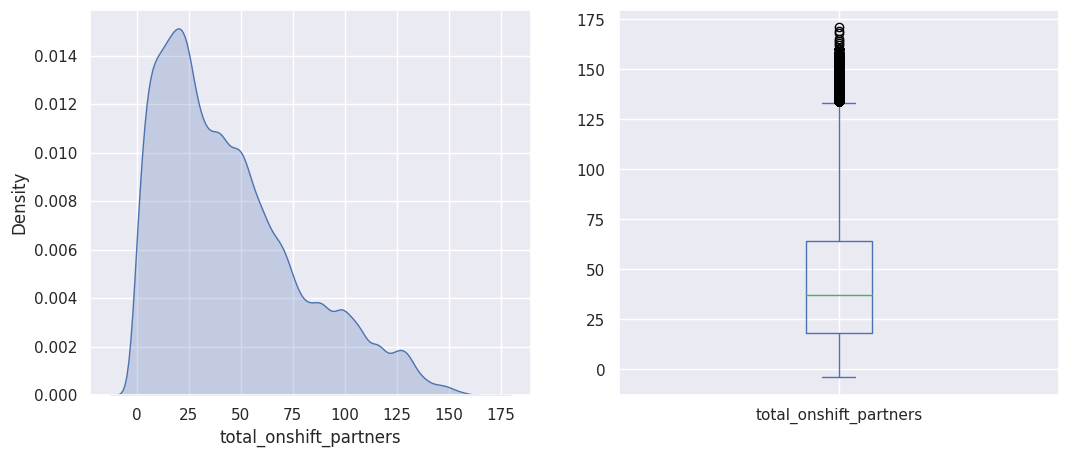

In [ ]:
plt.subplot(121)
sns.kdeplot(df.total_onshift_partners, shade=True)
plt.subplot(122)
df.total_onshift_partners.plot.box(figsize=(12.5,5))
plt.show()

## 7. total_busy_partners :

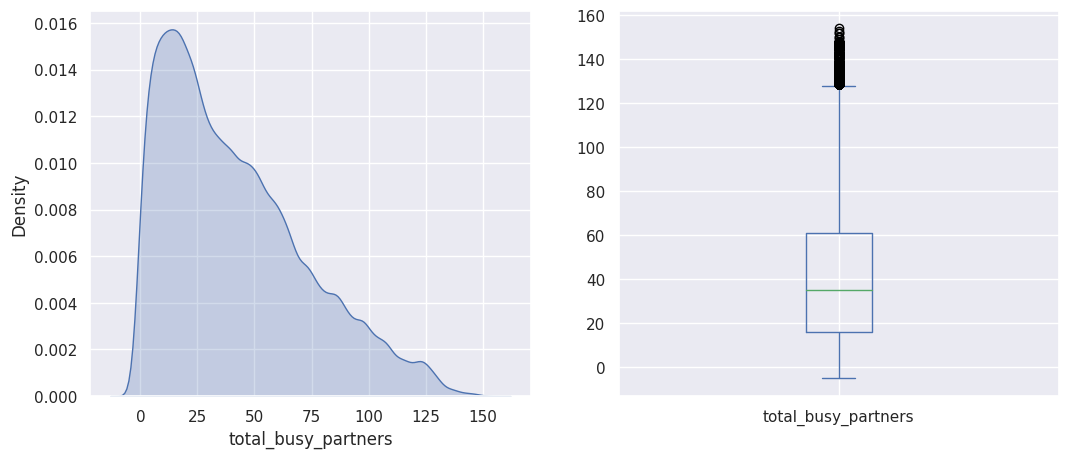

In [ ]:
plt.subplot(121)
sns.kdeplot(df.total_busy_partners, shade=True)
plt.subplot(122)
df.total_busy_partners.plot.box(figsize=(12.5,5))
plt.show()

## 8. day :

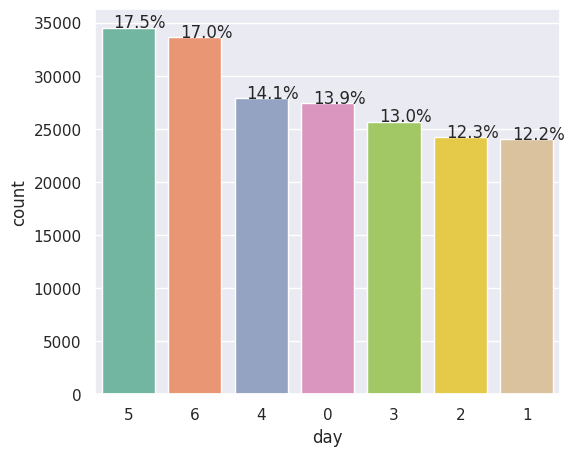

In [ ]:
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.countplot(data=df,x="day", order = df['day'].value_counts().head(20).index, palette= "Set2")
ax.set_xticklabels(ax.get_xticklabels())
without_hue(ax,df.day)

## Heat Map:


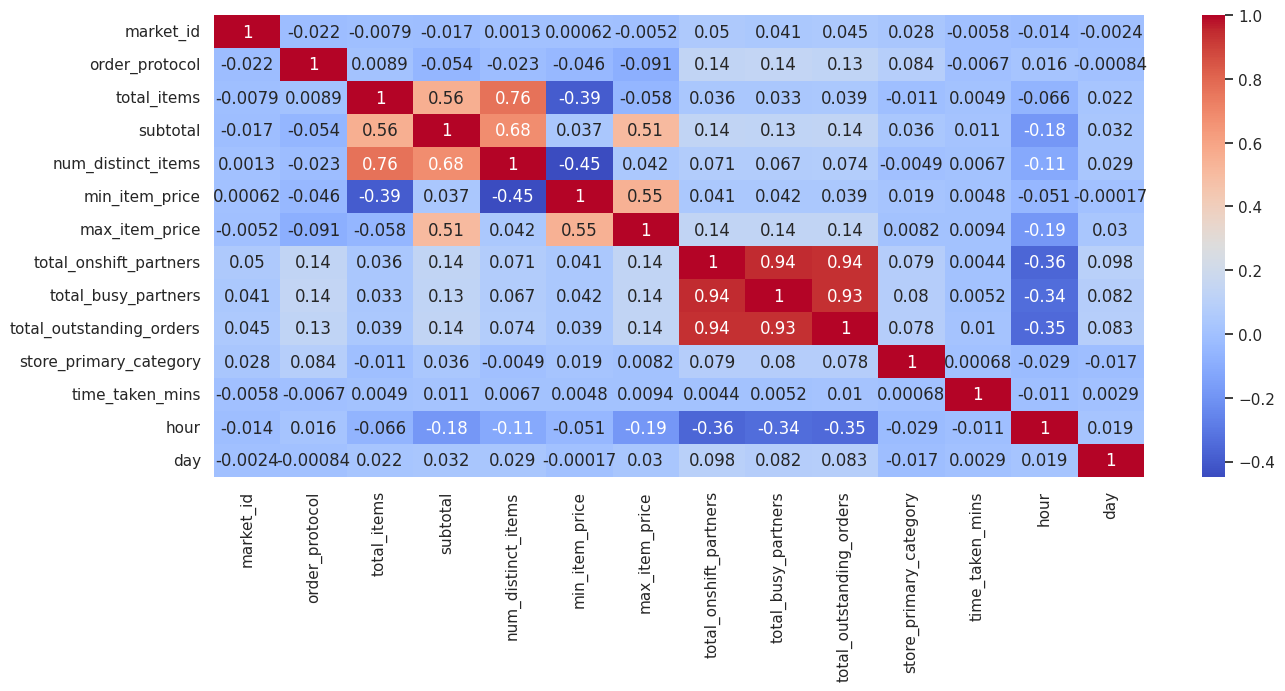

In [ ]:
sns.set(rc={'figure.figsize':(15,6)})
sns.heatmap(df.corr(), annot=True, cmap= "coolwarm")
plt.show()

#**Insights:**
- Most of the orders are from American, pizza and mexican category restaurants.
- Most of the orders have been made through protocols 1, 3 and 5.
- 1 and 2 distinct items are mostly ordered at once. The count starts decreasing after 2. The same goes for total items.
- Market IDs 2 and 4 dominate the dataset with highest number of orders.
- Its weird to see that more no. of the orders have been made in the early hours of day which 1, 2 and 3. (External source: Porter is based out of b'lore which is an IT hub. Those orders might be from tech professionals working night shifts.) We also do not have any information on orders after 7 until 14:00.
- Its no surprise that most of the orders are during weekends.

**Inference from the above heat plot**
- num_distinct_items is highly correlated with total_items and subtotal.
- Total_onshift_partners, total_busy_partners, total_outstanding orders are highly correlated with each other.
- Hour_of_day and outstanding_orders are highly positive correlated with the time_taken. This is obvious that food preparation time is dependent on the store, Hour_of_day determines traffic and delivery partner availability, more number of outstanding orders results in delay in partner allocation

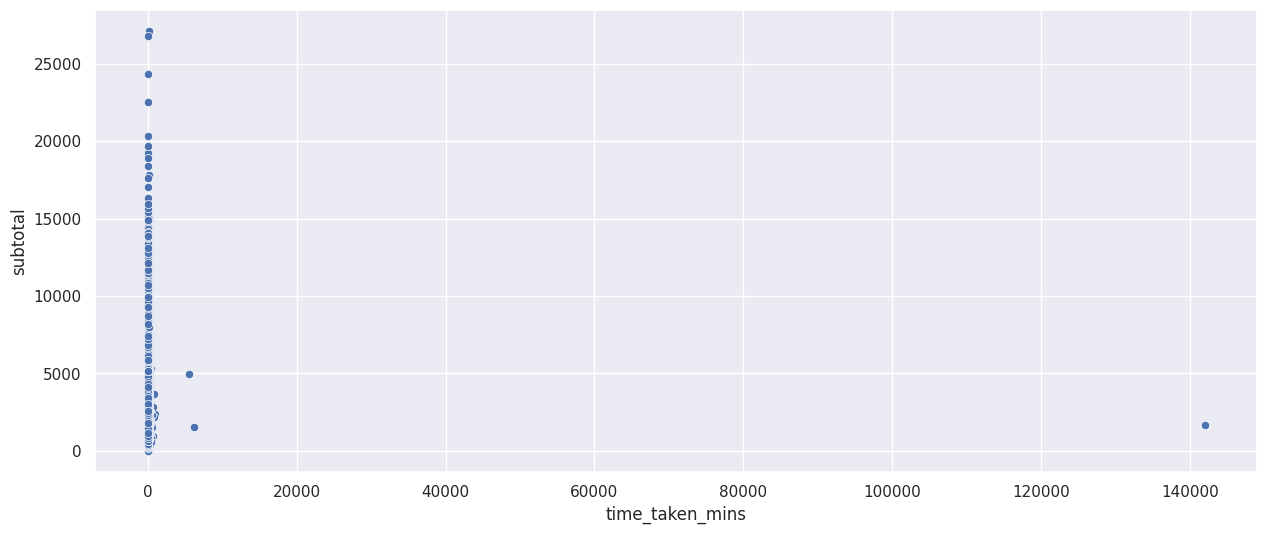

In [ ]:
# Check for outliers
sns.scatterplot(x='time_taken_mins', y='subtotal', data=df)
plt.show()

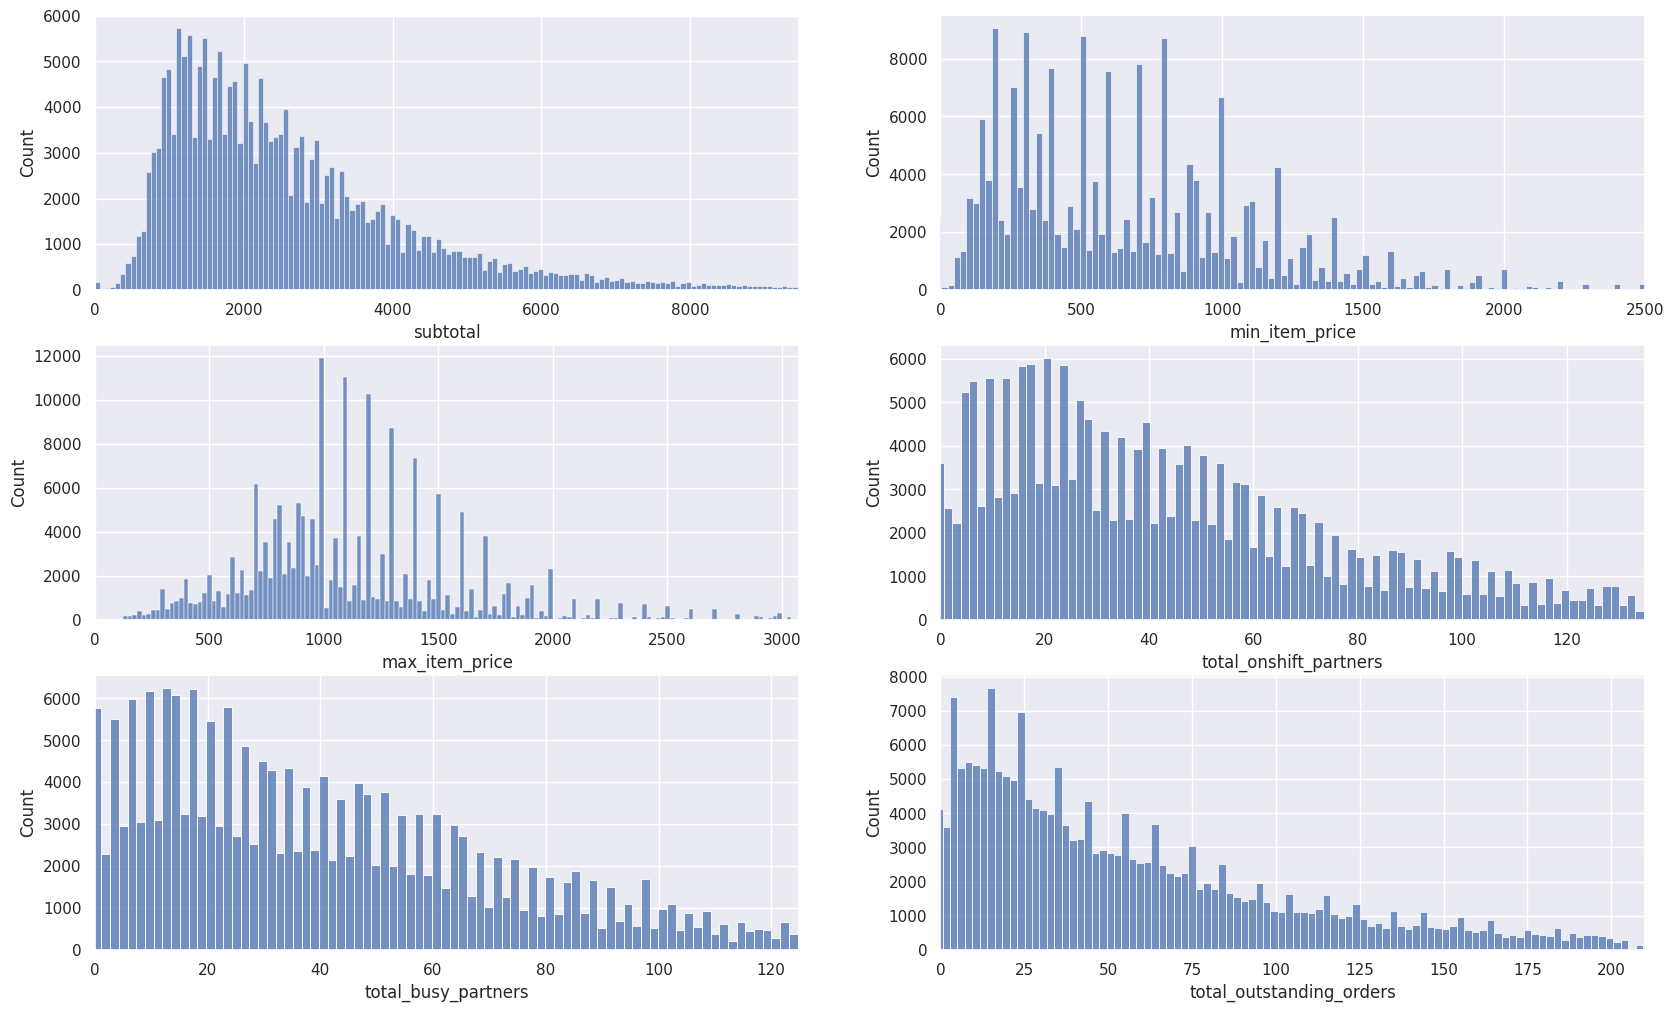

In [ ]:
plt.figure(figsize=(20, 25))
i = 1
for var in cont_var:
    plt.subplot(6,2,i)
    plt.xlim([0, df[var].quantile(.99)])
    sns.histplot(df[var])
    i += 1
plt.show()

**We can see that almost all plots are heavily right skewed. This shows the presence of outliers in our dataset.**

#**Outlier Detection:**

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
model = LocalOutlierFactor()

df['lof_anomaly_score'] = model.fit_predict(df[['subtotal', 'time_taken_mins']])

In [ ]:
df

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,store_primary_category,time_taken_mins,hour,day,lof_anomaly_score
0,1,1,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,4,62.983333,22,4,1
1,2,2,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,47,67.066667,21,1,1
2,3,1,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,4,29.683333,20,3,1
3,3,1,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,4,51.250000,21,1,1
4,3,1,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,4,39.833333,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1,4,3.0,1389.0,3.0,345.0,649.0,17.0,17.0,23.0,28,65.116667,0,1,1
197424,1,4,6.0,3010.0,4.0,405.0,825.0,12.0,11.0,14.0,28,56.383333,0,4,1
197425,1,4,5.0,1836.0,3.0,300.0,399.0,39.0,41.0,40.0,28,50.133333,4,5,1
197426,1,1,1.0,1175.0,1.0,535.0,535.0,7.0,7.0,12.0,59,65.116667,18,6,1


number of outliers :  (6834, 6834)


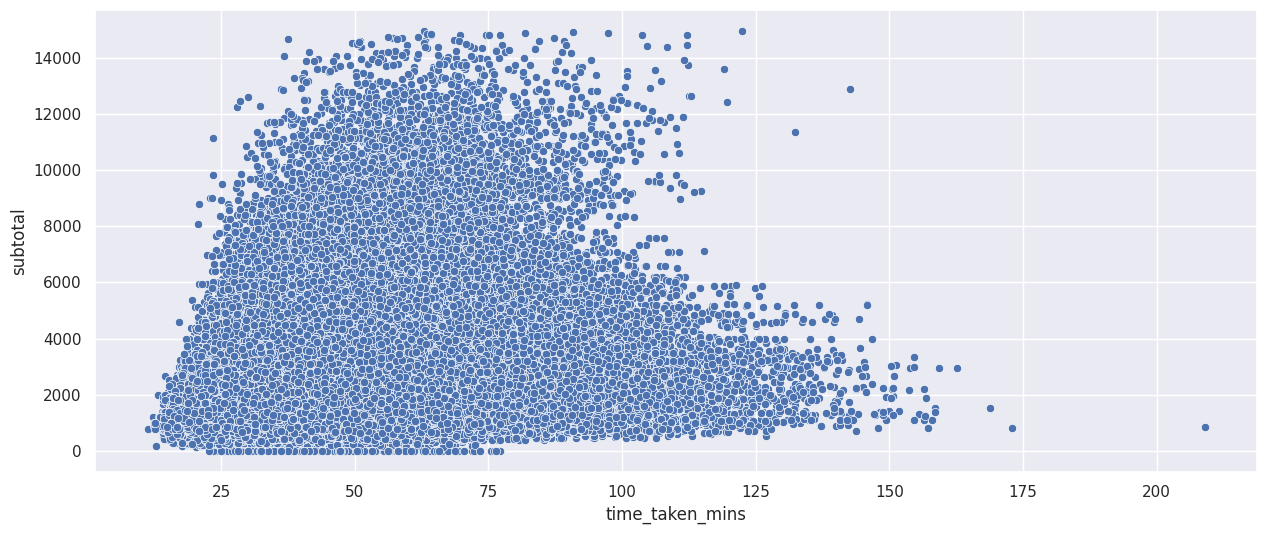

In [ ]:
print("number of outliers : ",(len(df[df['lof_anomaly_score'] == -1]), (df['lof_anomaly_score'] == -1).sum()))
df_1 = df[df['lof_anomaly_score'] == 1]

sns.scatterplot(x='time_taken_mins', y='subtotal', data=df_1)

# drop anomaly column
df.drop(['lof_anomaly_score'],axis=1,inplace=True)

number of outliers :  (2223, 2223)


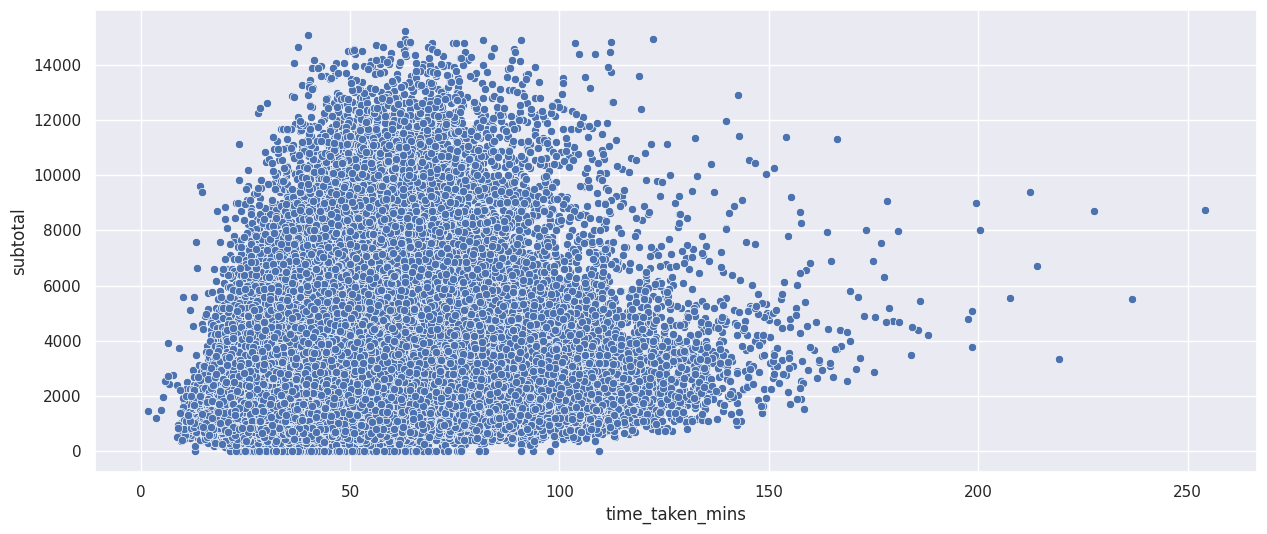

In [ ]:
# Repeat globally
df['lof_anomaly_score'] = model.fit_predict(df)
print("number of outliers : ",(len(df[df['lof_anomaly_score'] == -1]), (df['lof_anomaly_score'] == -1).sum()))
df = df[df['lof_anomaly_score'] == 1]

sns.scatterplot(x='time_taken_mins', y='subtotal', data=df)

# drop anomaly
df.drop(['lof_anomaly_score'],axis=1,inplace=True)

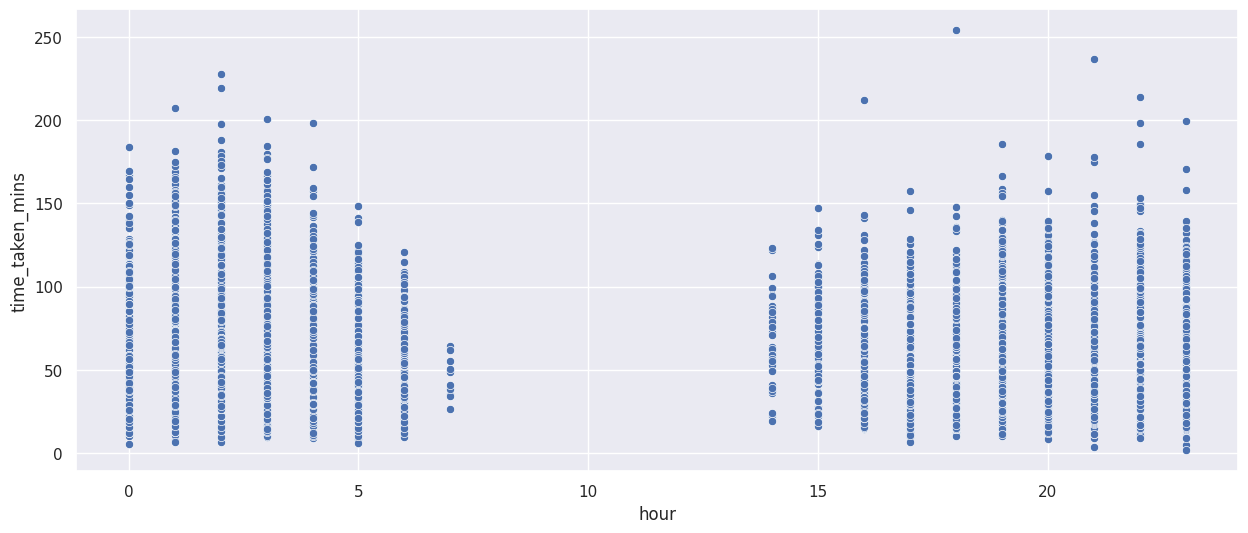

In [ ]:
sns.scatterplot(data=df, x="hour", y="time_taken_mins")
plt.show()

#**Baseline Model: Training Random Forest**

1. Zooming out
2. Data Split
3. Model Random Forest
4. Evaluation metrics and its interpretation
5. Feature importance

In [ ]:
from sklearn.model_selection import train_test_split
# Data_split

y=df['time_taken_mins']
x = df.drop(['time_taken_mins'], axis=1)
df.drop(['time_taken_mins'], axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=42)

In [ ]:
X_train.shape, y_train.shape

((156164, 13), (156164,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Model Random Forest
regressor = RandomForestRegressor()

regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Prediction
prediction = regressor.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print("MSE : ", mse)
print("RMSE : ",rmse)

mae = mean_absolute_error(y_test, prediction)
print('MAE:' ,mae)

r2_score = r2_score(y_test, prediction)
print('R_Squared:' ,r2_score)

MSE :  226.382953959116
RMSE :  15.046027846548604
MAE: 11.290205582590964
R_Squared: 0.2645431262026725


In [ ]:
import numpy as np
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [ ]:
print("MAPE : ",MAPE(y_test, prediction))

MAPE :  26.436161127563405


Text(0.5, 0, 'Random Forest Feature Importance')

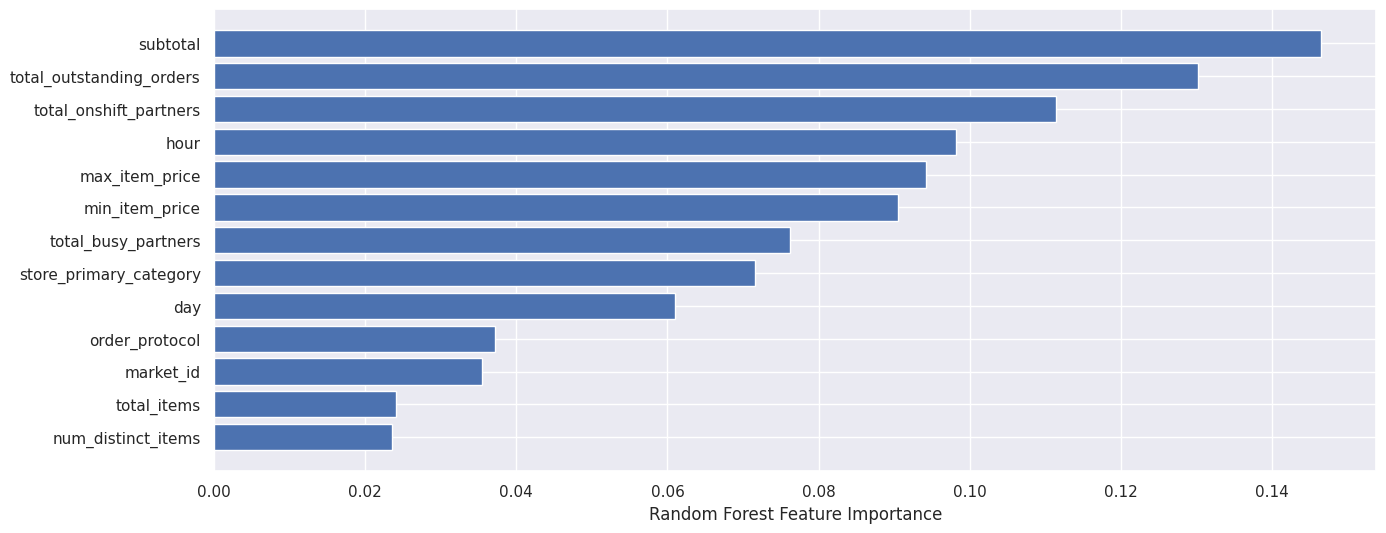

In [ ]:
# Feature importance

sorted_idx = regressor.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

**R2 score of 0.26 and RMSE of 15.04 was found on test dataset. RMSE of 15.04 means on an average the delivery time prediction is off by 15 mins.**

# **Training Neural Networks:**

1. Scaling of Features
2. Define Model
3. Model.fit
4. Plots
5. Model.predict
5. Evaluate

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2,  random_state=42)

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(256,  kernel_initializer='normal', activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=30, batch_size=512, verbose=1, validation_split=0.2)

Epoch 1/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 29s 110ms/step - loss: 3218.3411 - mae: 27.2737 - mse: 3218.3411 - val_loss: 318.9586 - val_mae: 12.5952 - val_mse: 318.9586
Epoch 2/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - loss: 274.4936 - mae: 12.3792 - mse: 274.4936 - val_loss: 302.8553 - val_mae: 14.0252 - val_mse: 302.8553
Epoch 3/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 44s 121ms/step - loss: 259.7855 - mae: 12.1425 - mse: 259.7855 - val_loss: 317.9444 - val_mae: 12.6707 - val_mse: 317.9444
Epoch 4/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 37s 106ms/step - loss: 252.4632 - mae: 11.9122 - mse: 252.4632 - val_loss: 267.9818 - val_mae: 11.7843 - val_mse: 267.9818
Epoch 5/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 42s 111ms/step - loss: 250.1829 - mae: 11.8208 - mse: 250.1829 - val_loss: 259.8552 - val_mae: 11.7264 - val_mse: 259.8552
Epoch 6/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 25s 104ms/step - loss: 251.2468 - mae: 11.8729 - mse: 251.2468 - val_loss: 254.9157 - val_mae: 11.8339 - val_mse: 254.9157
Epoch 7/30
245/245 ━

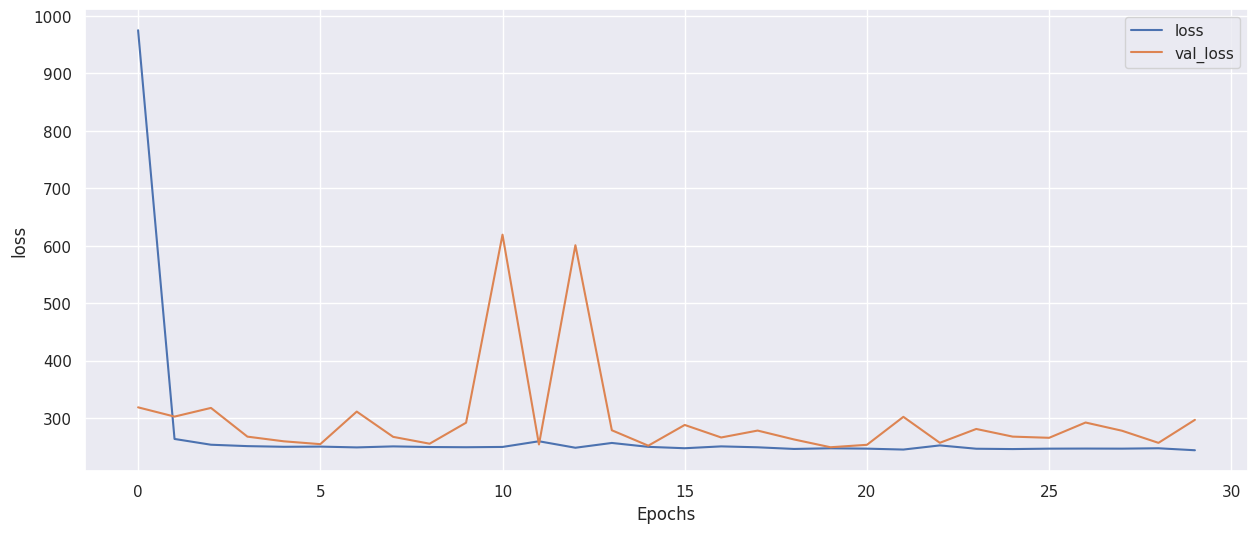

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'loss')

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
print("MAPE : ",MAPE(y_test, prediction))

MAPE :  0.26436161127563407


### There is a huge improvement from Random forest MAPE score to Neural Network MAPE score.
* RF = 26.40
* NN =  0.26

#**Questions:**

###**1. Defining the problem statements and where can this and modifications of this be used?**
* Porter wants to accurately estimate delivery times for food orders placed from various restaurants. The goal is to use the provided dataset to train a regression model that can predict the delivery time based on factors such as the number of items ordered, restaurant category, availability of delivery partners, and the number of ongoing orders. The key challenge is predicting delivery times by considering both the restaurant's location and the real-time capacity of delivery partners.

###**2. List 3 functions the pandas datetime provides with one line explanation.**

* Get ordinal day of the year : df.Time.dt.dayofyear.head()
* Get name of each date  : df.Time.dt.weekday_name.head()
* Get hour detail from time data  : df.Time.dt.hour.head()

###**3. Short note on datetime, timedelta, time span (period)**

Timedelta : A timedelta object represents a duration, the difference between two dates or times. All arguments are optional and default to 0 . Arguments may be integers or floats, and may be positive or negative.

Time span: timedelta denotes a span of time. It's the difference between two date , time , or datetime objects. If you add or subtract two date , time , or datetime objects, you'll get a timedelta object.

datetime : The datetime module supplies classes for manipulating dates and times.While date and time arithmetic is supported, the focus of the implementation is on efficient attribute extraction for output formatting and manipulation.

###**4. Why do we need to check for outliers in our data?**

* Identification of potential outliers is important for the following reasons. An outlier may indicate bad data. For example, the data may have been coded incorrectly or an experiment may not have been run correctly.

###**5. Name 3 outlier removal methods?**

 Most popular outlier detection methods are Z-Score, IQR (Interquartile Range), Mahalanobis Distance, DBSCAN (Density-Based Spatial Clustering of Applications with Noise, Local Outlier Factor (LOF), and One-Class SVM (Support Vector Machine).

###**6. What classical machine learning methods can we use other than random forest for regression?**

Linear Regression
Lasso Regression
Ridge Regression
Polynomial Regression

###**7. Why is scaling required for neural networks?**

Having features on a similar scale will help the gradient descent converge more quickly towards the minima. Specifically, in the case of Neural Networks Algorithms, feature scaling benefits optimization by: It makes the training faster. It prevents the optimization from getting stuck in local optima.

###**8. Briefly explain your choice of optimizer.**


Adam : The method computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients.
The algorithms leverages the power of adaptive learning rates methods to find individual learning rates for each parameter. It also has advantages of Adagrad [10], which works really well in settings with sparse gradients, but struggles in non-convex optimization of neural networks, and RMSprop [11], which tackles to resolve some of the problems of Adagrad and works really well in on-line settings.

###**9. Which activation function did you use and why?**

ReLU : The rectified linear activation function or ReLU is a non-linear function or piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

ReLU helps to prevent the exponential growth in the computation required to operate the neural network.

###**10. Why does a neural network perform well on a large dataset?**

Training on large datasets helps counter the neural network problem of high variance to a certain extent. The chances of overfitting the training data are drastically reduced when the model is exposed to a larger number of samples of data.




# **Insights:**

1. **Data Overview:**
   - The dataset spans a short duration of 5 months, with orders created between October 2014 and February 2015.
   - The deliveries primarily cover two markets, and the majority of the orders come from restaurants categorized as "American," "Pizza," and "Mexican."
   - There are 7 unique order protocols, but detailed information on what each protocol signifies is missing.
   - Most orders consist of small carts, with 75% of the orders containing 4 or fewer items, and distinct items per order ranging mostly from 1 to 2.
   - Prices show a wide variation with outliers, where some orders have item prices as high as ₹14,700, while 75% of the orders are priced under ₹949.

2. **Order Timing Patterns:**
   - Most orders occur during unusual hours (1 AM to 3 AM), possibly due to tech professionals working night shifts, considering that Porter operates in Bengaluru, an IT hub.
   - There is a gap in the data between 7 AM and 2 PM, with most orders peaking during weekends.

3. **Feature Correlation and Relationships:**
   - **High Correlation:**
     - The number of distinct items is strongly correlated with the total number of items and the subtotal.
     - Features related to delivery partner availability (on-shift partners, busy partners, and outstanding orders) show a strong correlation, as expected in a logistics environment.
   - **Time Taken for Delivery:**
     - The delivery time is strongly influenced by the time of day (hour), number of outstanding orders, and partner availability, which highlights the impact of traffic and delivery load during peak hours.

4. **Outliers and Data Skewness:**
   - The dataset contains significant outliers, particularly in pricing and order size, which are reflected in the right-skewed distributions of many features.
   - These outliers may adversely affect the accuracy of models and should be addressed via data cleaning techniques.

5. **Model Performance:**
   - **Baseline Random Forest Model:**
     - The performance of the Random Forest model yielded an MAPE score of **26.4%**, suggesting moderate prediction accuracy.
     - The most influential features identified by Random Forest were subtotal, total outstanding orders, and total on-shift partners.
   - **Neural Network Model:**
     - The Neural Network model shows significant improvement with an MAPE score of **0.26%**, highlighting its effectiveness in capturing complex, non-linear relationships in the data.

---

# **Recommendations:**

1. **Data Cleaning & Handling Outliers:**
   - Address the presence of outliers in features such as subtotal and item prices. This can be done through scaling techniques (e.g., log transformation) or capping extreme values to ensure that they do not skew model predictions.
   - Handling missing values in certain features before retraining the models will help improve their accuracy and robustness.

2. **Additional Data Collection:**
   - The dataset is limited to 5 months, and there is a noticeable gap in data collection between 7 AM and 2 PM. Collecting data for a longer duration and across all hours would provide more comprehensive insights into ordering patterns and delivery time variations.
   - Gather more detailed information on the order protocols. Understanding how different protocols affect delivery times could provide additional features for improving the model.

3. **Feature Engineering:**
   - Given the high correlation between hour_of_day', 'outstanding_orders', and delivery time, consider creating time-related features such as **rush hour flags** or **weekday/weekend indicators** to help the model capture time-dependent patterns more effectively.
   - Traffic and weather data could be incorporated to further improve the model's accuracy, particularly during rush hours or adverse weather conditions.

4. **Model Tuning and Experimentation:**
   - The significant performance gap between the Random Forest and Neural Network models suggests that neural networks capture the complexity of the problem better. However, more model experimentation with hyperparameter tuning, ensemble models, and possibly gradient boosting techniques could further improve performance.
   - Conduct cross-validation and model tuning to improve the generalizability of the neural network model and avoid overfitting.

5. **Operational Adjustments for Porter:**
   - **Real-time adjustments:** The strong correlation between outstanding orders, partner availability, and delivery time suggests that Porter should dynamically allocate more delivery partners during peak hours and periods of high outstanding orders.
   - **Pricing Strategy:** Porter could implement surge pricing during high traffic hours or periods with fewer available partners, using the model’s predictions to justify price adjustments to customers.

6. **Improving Customer Experience:**
   - Use the improved Neural Network model to provide more accurate delivery time estimates to customers at the time of placing orders, thus managing expectations and reducing dissatisfaction due to delays.

By following these recommendations, Porter can improve its delivery time estimations, optimize operations, and enhance customer satisfaction.